In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import glob
import os
import pandas as pd


In [2]:
## Mount Google Drive directory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install waipy pycwt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 758 kB 7.5 MB/s 
  Created wheel for waipy: filename=waipy-0.0.9.0-py3-none-any.whl size=10305 sha256=d08dac6d73680d2bddad1be61cb43c97da394c8a866c4b3b118af4ecabd1b482
  Stored in directory: /root/.cache/pip/wheels/45/7a/77/219a3ec94d7966af452c46a2ffba054aad41257cfc3fc1fdf8
  Created wheel for pycwt: filename=pycwt-0.3.0a22-py3-none-any.whl size=17825 sha256=2790e0cacb39cbb432c898bd0952c1b5e5122ebb09af51e51dee6d73e9fe1f31
  Stored in directory: /root/.cache/pip/wheels/53/99/6b/a43c99414482c20862ca8917862237de8bd27ee795a55faa6c
Successfully built waipy pycwt


In [14]:
csv_dir='/content/drive/MyDrive/Goel_2022_data_for_colab/'
# Mean_ON2_df=pd.read_csv('%sMean_ON2.csv' % (csv_dir)) 
# PCs_1to6_df=pd.read_csv('%sPCs_1to6.csv' % (csv_dir)) 
Weight_df=pd.read_csv('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/' + 'weights_time_series' + '.csv')
solar_df=pd.read_csv('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/Solar_index_Q6DW_time.csv')

In [5]:
# Mean_ON2_df

In [6]:
# plt.scatter(Mean_ON2_df['lon'],Mean_ON2_df['lat'],c=Mean_ON2_df['ON2'],vmax=1,vmin=0,cmap='rainbow')

In [7]:

# PCs_1to6_df

In [8]:
# tar_pca=6
# s_PCs_1to6_df=PCs_1to6_df[PCs_1to6_df['pca']==tar_pca-1]
# plt.scatter(s_PCs_1to6_df['lon'],s_PCs_1to6_df['lat'],c=s_PCs_1to6_df['ON2'],vmax=0.1,vmin=-0.1,cmap='coolwarm')

In [9]:
Weight_df

,Unnamed: 0,81,82,83,84,85,86,87,88,89,...,126,127,128,129,130,131,132,133,134,135
0,0,0.025260,0.020484,0.189489,-0.978299,-1.404730,-1.390270,-1.196812,-1.018466,-0.822817,...,-0.640932,0.206819,-0.100577,-0.751996,-1.160730,-1.445690,-0.583301,-1.014796,-0.853497,-1.625207
1,1,1.990274,1.576872,1.365698,0.570557,0.040946,0.172902,0.171242,0.166593,0.423824,...,-0.725151,-0.397086,-0.588517,-0.352921,-0.077954,-0.111681,0.041610,-0.398867,-0.392900,-0.160632
2,2,0.041736,0.078893,-0.168274,0.042483,0.010876,-0.314744,-0.112823,0.278183,0.382450,...,-0.023572,-0.462823,-0.584435,-0.144264,-0.244429,0.289262,-0.361787,-0.329231,-0.401293,-0.255875
3,3,-0.107351,0.926589,0.768153,0.120986,-0.133354,-0.242218,-0.394911,-0.134544,-0.126712,...,0.572201,0.433678,0.704026,0.642423,0.512556,0.487882,0.226005,-0.044621,-0.082493,0.041148
4,4,-0.298210,0.103169,-0.065729,0.296365,0.147666,0.117122,0.137218,-0.042274,-0.044322,...,-0.292535,0.503870,0.299070,-0.074844,0.099460,-0.295306,0.259380,0.274952,0.372742,0.151205
5,5,0.484270,0.590515,0.655852,0.586835,0.286828,0.177150,0.084078,-0.129069,-0.125775,...,-0.322643,-0.723801,0.013351,-0.089716,-0.193148,0.143459,0.347728,0.482012,0.485728,0.453702


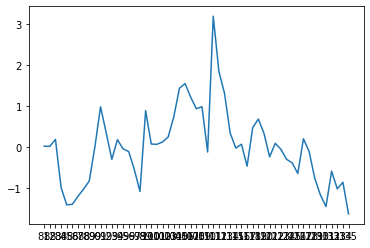

In [10]:
plt.plot(Weight_df.columns[1:],Weight_df.iloc[0][1:])

In [11]:
import numpy as np 
global days
days=np.array(Weight_df.columns[1:],dtype=int)

plt.rcParams.update({
    "font.size": 20,
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "lightgray",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})

def weight_v_time_plot(ax,Weight_df, pc_no, title):# main_folder, sub_folder, title, it, save_path, save = 0):
    weights=Weight_df.iloc[pc_no-1][1:]

    # fig,ax = plt.subplots(1, 1, figsize=(20,3))
    ax.plot(days,weights, color = 'g',linestyle='dashed', marker='o',
     markerfacecolor='blue')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
    plt.xlabel("Day of Year 2020")#, fontsize = 20
    plt.xticks(days)
    plt.ylabel("Weight")
    plt.title(title, fontsize=23)
    # plt.xticks(rotation=45)
    plt.xticks(np.arange(81, 135+3, 3.0))



    plt.xlim([81,135])
    plt.xticks(np.arange(81, 135+3, 3.0))
    # plt.xlim([min(days),max(days)])
    plt.ylim([-abs(np.nanmax(weights)),abs(np.nanmax(weights))])
    # plt.yticks(np.arange(-abs(np.nanmax(weights)),abs(np.nanmax(weights))+1, 1))
    return plt,ax
   
    
    # #save = 1
    # #plt.savefig('/Users/divyamgoel/Desktop/research/On2spec/Stormdata/Stormpics/sos/miter/WeightsAGU' + str(pc_no + 1) + '.jpg', dpi = 300, bbox_inches = 'tight')
    # if save:
    #     #save_path = '/Users/divyamgoel/Desktop/research/On2spec/Stormdata/Stormpics/sos/miter/'+main_folder+'/'+sub_folder + str(pc_no+1)+'/'
    #     if not os.path.exists(save_path):
    #         os.makedirs(save_path)
            
    #     save_path +=  title + '.jpg'
    #     plt.savefig(save_path, dpi = 300, bbox_inches='tight')
    # plt.show()

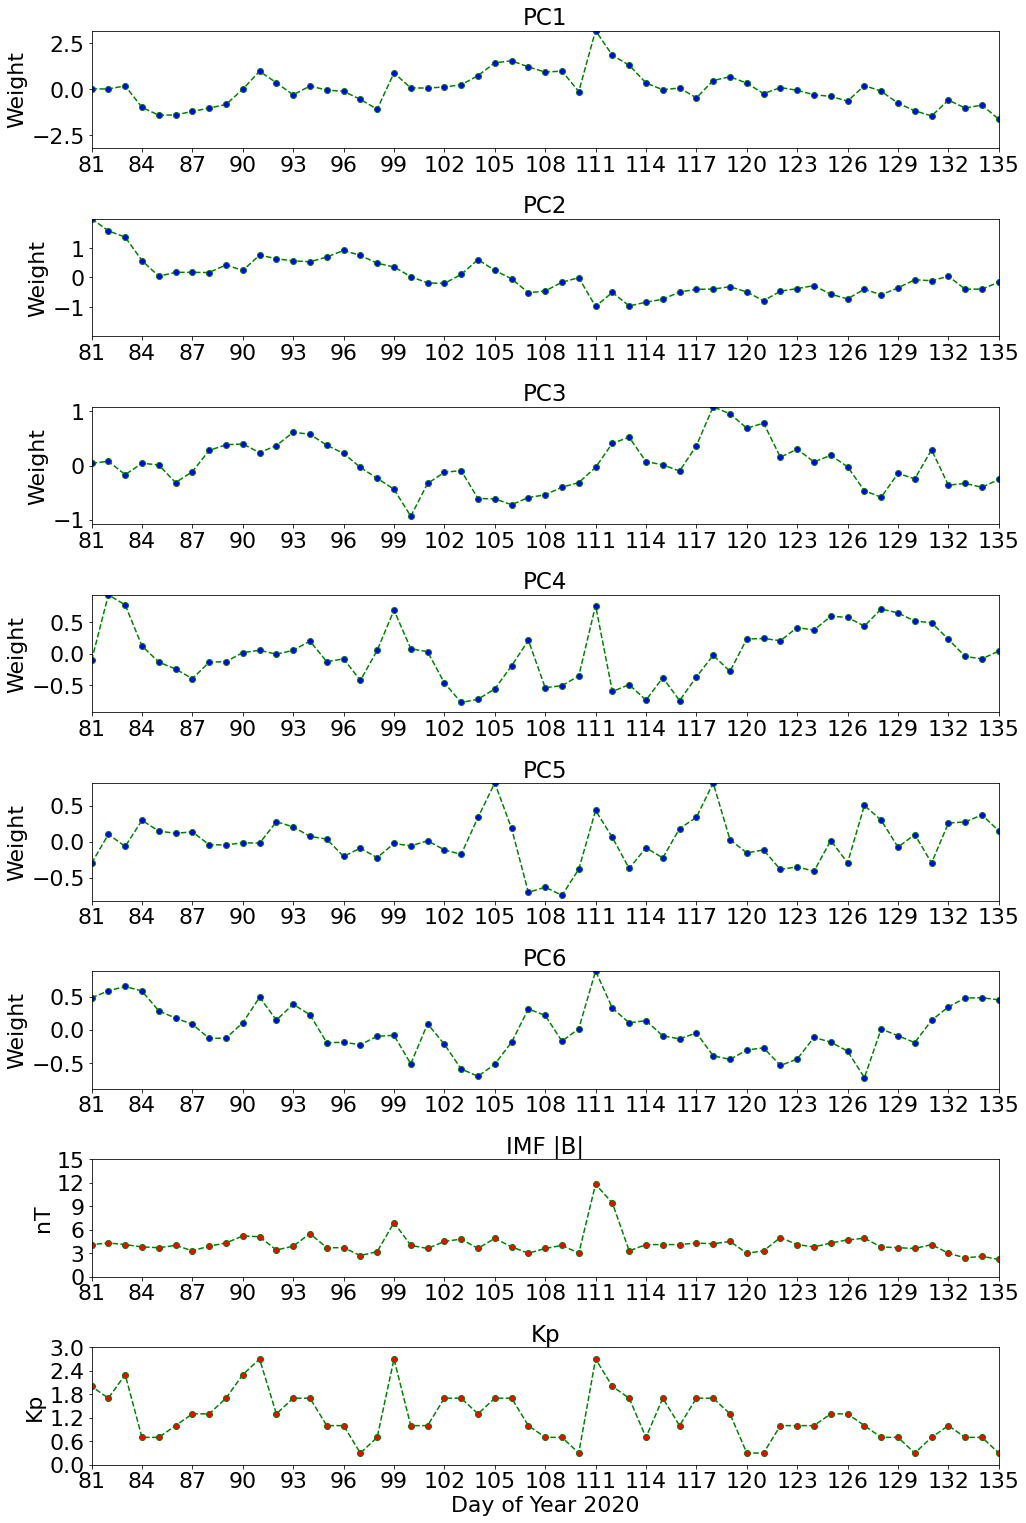

In [12]:
import matplotlib.gridspec as gridspec
plt.rcParams.update({
    "font.size": 22,
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "lightgray",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})

fig,ax=plt.subplots(figsize=(14,24))
gs = gridspec.GridSpec(8,1) 
# fig.suptitle('Wavelet-Morlet GOLD O/N2 Lon[-30,-60]',size=15,x=0.55)

for g_idx in range(0,6):
    ax2=plt.subplot(gs[g_idx,0])
    pc_no=g_idx+1
    title='PC%1i' % (pc_no)
    plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
    if (g_idx < 6):
      plt.xlabel('')



ax2=plt.subplot(gs[6,0])
pc_no=g_idx+1
title='IMF |B|' 
# plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
# if (g_idx < 5):
#   plt.xlabel('')
ax2.plot(solar_pd['DOY'],solar_pd['IMF'], color = 'g',linestyle='dashed', marker='o',
  markerfacecolor='red')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
plt.xlabel("Day of Year 2020")#, fontsize = 20
plt.xticks(solar_pd['DOY'])
plt.ylabel("nT")
plt.title(title, fontsize=23)
# plt.xticks(rotation=45)
plt.xticks(np.arange(81, 135+3, 3.0))
plt.yticks(np.arange(0, 15+3, 3.0))


plt.xlim([81,135])
plt.ylim([0,15])
plt.xlabel('')

ax2=plt.subplot(gs[7,0])
pc_no=g_idx+1
title='Kp' 
# plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
# if (g_idx < 5):
#   plt.xlabel('')
ax2.plot(solar_pd['DOY'],solar_pd[title]/10., color = 'g',linestyle='dashed', marker='o',
  markerfacecolor='red')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
plt.xlabel("Day of Year 2020")#, fontsize = 20
plt.xticks(solar_pd['DOY'])
plt.ylabel("Kp")
plt.title(title, fontsize=23)
# plt.xticks(rotation=45)
plt.xticks(np.arange(81, 135+3, 3.0))
plt.yticks(np.arange(0, 3+0.6, 0.6))


plt.xlim([81,135])
plt.ylim([0,3])


left  = 0.1  # the left side of the subplots of the figure
right = 1   # the right side of the subplots of the figure
bottom = 0.07   # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.5#0.2   # the amount of width reserved for blank space between subplots
hspace = 0.6#0.2   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.savefig('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/' + 'weights_plot' + '.jpeg', dpi = 300, bbox_inches = 'tight')


In [15]:
solar_pd=solar_df[(solar_df['DOY'] >= 80) & (solar_df['DOY'] <= 136)]

In [16]:
np.shape(days)
solar_pd

,YEAR,DOY,HR,IMF,SW_Density,SW_speed,SW_Pressure,Kp,Dst,F107
20,2020,80,0,4.2,4.0,426.0,1.36,17,-14,71.1
21,2020,81,0,4.1,3.6,466.0,1.56,20,-14,70.3
22,2020,82,0,4.3,4.5,451.0,1.83,17,-8,69.8
23,2020,83,0,4.1,4.5,478.0,2.00,23,-11,69.9
24,2020,84,0,3.8,3.2,441.0,1.20,7,-6,70.8
25,2020,85,0,3.7,4.0,392.0,1.12,7,-4,70.9
26,2020,86,0,4.0,5.0,394.0,1.47,10,-1,69.9
27,2020,87,0,3.3,4.5,400.0,1.38,13,-5,69.2
28,2020,88,0,3.9,6.0,372.0,1.54,13,-3,69.0
29,2020,89,0,4.3,5.0,402.0,1.51,17,-6,68.6


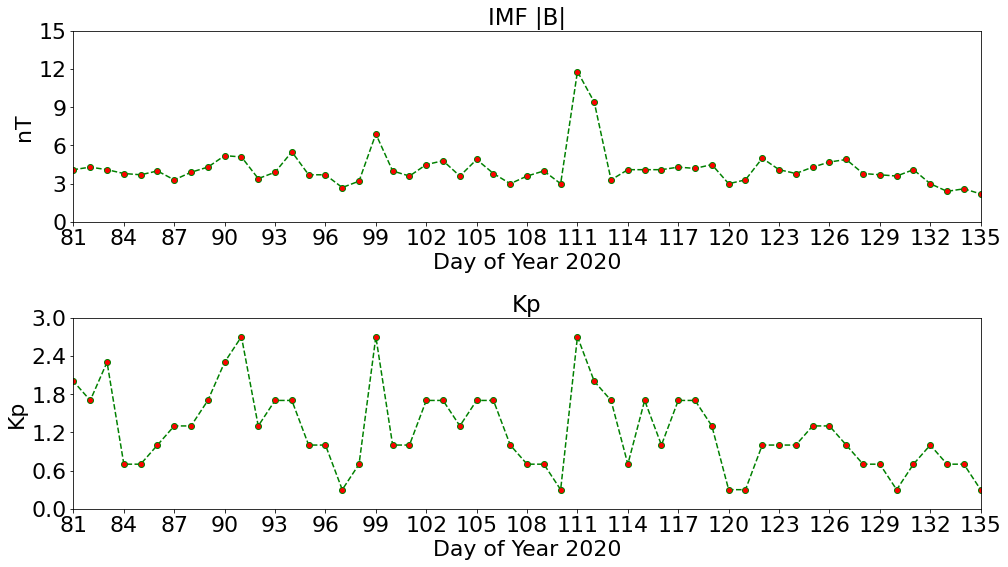

In [17]:
plt.rcParams.update({
    "font.size": 22,
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "lightgray",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})
fig,ax=plt.subplots(figsize=(14,8))
gs = gridspec.GridSpec(2,1) 
# fig.suptitle('Wavelet-Morlet GOLD O/N2 Lon[-30,-60]',size=15,x=0.55)

ax=plt.subplot(gs[0,0])
pc_no=g_idx+1
title='IMF |B|' 
# plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
# if (g_idx < 5):
#   plt.xlabel('')
ax.plot(solar_pd['DOY'],solar_pd['IMF'], color = 'g',linestyle='dashed', marker='o',
  markerfacecolor='red')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
plt.xlabel("Day of Year 2020")#, fontsize = 20
plt.xticks(solar_pd['DOY'])
plt.ylabel("nT")
plt.title(title, fontsize=23)
# plt.xticks(rotation=45)
plt.xticks(np.arange(81, 135+3, 3.0))
plt.yticks(np.arange(0, 15+3, 3.0))


plt.xlim([81,135])
plt.ylim([0,15])

ax=plt.subplot(gs[1,0])
pc_no=g_idx+1
title='Kp' 
# plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
# if (g_idx < 5):
#   plt.xlabel('')
ax.plot(solar_pd['DOY'],solar_pd[title]/10., color = 'g',linestyle='dashed', marker='o',
  markerfacecolor='red')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
plt.xlabel("Day of Year 2020")#, fontsize = 20
plt.xticks(solar_pd['DOY'])
plt.ylabel("Kp")
plt.title(title, fontsize=23)
# plt.xticks(rotation=45)
plt.xticks(np.arange(81, 135+3, 3.0))
plt.yticks(np.arange(0, 3+0.6, 0.6))


plt.xlim([81,135])
plt.ylim([0,3])

left  = 0.1  # the left side of the subplots of the figure
right = 1   # the right side of the subplots of the figure
bottom = 0.07   # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.5#0.2   # the amount of width reserved for blank space between subplots
hspace = 0.5#0.2   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
# plt.savefig('/content/drive/MyDrive/Goel_2022_data_for_colab/' + 'solar_ind_plot' + '.jpeg', dpi = 300, bbox_inches = 'tight')


In [18]:
np.shape(days)

(55,)

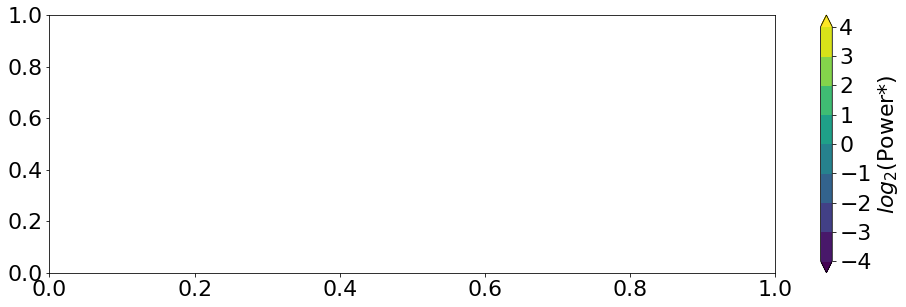

In [19]:
from __future__ import division
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find


pc_no=0
# select_time_idx= (datetime_array > datetime(2020,3,2))# & (datetime_array <= datetime(2020,4,28))
# Load and define the dataset
dat=Weight_df.iloc[pc_no-1][1:].values
title = 'Test GOLD PCA'
label = 'PC %1i' % (pc_no)
units = 'O/N2'
t0 = 0 # Start from day 81
dt = 1  # In days


# We also create a time array in years.
N = dat.size
t = numpy.arange(0, N) * dt + t0

# We write the following code to detrend and normalize the input data by its
# standard deviation. Sometimes detrending is not necessary and simply
# removing the mean value is good enough. However, if your dataset has a well
# defined trend, such as the Mauna Loa CO\ :sub:`2` dataset available in the
# above mentioned website, it is strongly advised to perform detrending.
# Here, we fit a one-degree polynomial function and then subtract it from the
# original data.
p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

# The next step is to define some parameters of our wavelet analysis. We
# select the mother wavelet, in this case the Morlet wavelet with
# :math:`\omega_0=6`.
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 /12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

# The following routines perform the wavelet transform and inverse wavelet
# transform using the parameters defined above. Since we have normalized our
# input time-series, we multiply the inverse transform by the standard
# deviation.
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
# iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

# We calculate the normalized wavelet and Fourier power spectra, as well as
# the Fourier equivalent periods for each wavelet scale.
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

# We could stop at this point and plot our results. However we are also
# interested in the power spectra significance test. The power is significant
# where the ratio ``power / sig95 > 1``.
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.99,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

# # Then, we calculate the global wavelet spectrum and determine its
# # significance level.
# glbl_power = power.max(axis=1)
# dof = N - scales  # Correction for padding at edges
# glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
#                                         significance_level=0.95, dof=dof,
#                                        wavelet=mother)

# # We also calculate the scale average between 2 years and 8 years, and its
# # significance level.
# sel = find((period >= 2) & (period < 8))
# Cdelta = mother.cdelta
# scale_avg = (scales * numpy.ones((N, 1))).transpose()
# scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
# scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
# scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
#                                              significance_level=0.95,
#                                              dof=[scales[sel[0]],
#                                                   scales[sel[-1]]],
#                                              wavelet=mother)

# Finally, we plot our results in four different subplots containing the
# (i) original series anomaly and the inverse wavelet transform; (ii) the
# wavelet power spectrum (iii) the global wavelet and Fourier spectra ; and
# (iv) the range averaged wavelet spectrum. In all sub-plots the significance
# levels are either included as dotted lines or as filled contour lines.

# Prepare the figure
# pyplot.close('all')
# pyplot.ioff()
# figprops = dict(figsize=(14,4), dpi=72)
# fig = pyplot.figure(**figprops)

plt.rcParams.update({
    "font.size": 22,
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "lightgrey",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})

fig,ax=plt.subplots(figsize=(14,4))#fig=pp.figure(figsize=(12,10)
gs = gridspec.GridSpec(1, 1) 

bx=plt.subplot(gs[0,0])

cmap='rainbow'
# fig.suptitle('Wavelet-Morlet GOLD O/N2 Lon[-30,-60]',size=15,x=0.55)

g_idx=3

#-----------
pc_no=g_idx+1
# select_time_idx= (datetime_array > datetime(2020,3,2))# & (datetime_array <= datetime(2020,4,28))
dat=Weight_df.iloc[pc_no-1][1:].values
# title = 'Test GOLD PCA'
label = 'PC %1i' % (pc_no)
units = 'O/N2'
t0 = 81
dt = 1  # freq in a day
#------- Calculation -----------
# We also create a time array in years.
N = dat.size
t = numpy.arange(0, N) * dt + t0

# We write the following code to detrend and normalize the input data by its
# standard deviation. Sometimes detrending is not necessary and simply
# removing the mean value is good enough. However, if your dataset has a well
# defined trend, such as the Mauna Loa CO\ :sub:`2` dataset available in the
# above mentioned website, it is strongly advised to perform detrending.
# Here, we fit a one-degree polynomial function and then subtract it from the
# original data.
p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

# The next step is to define some parameters of our wavelet analysis. We
# select the mother wavelet, in this case the Morlet wavelet with
# :math:`\omega_0=6`.
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 /12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

# The following routines perform the wavelet transform and inverse wavelet
# transform using the parameters defined above. Since we have normalized our
# input time-series, we multiply the inverse transform by the standard
# deviation.
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

# We calculate the normalized wavelet and Fourier power spectra, as well as
# the Fourier equivalent periods for each wavelet scale.
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

# We could stop at this point and plot our results. However we are also
# interested in the power spectra significance test. The power is significant
# where the ratio ``power / sig95 > 1``.
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                        significance_level=0.95,
                                        wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

# Then, we calculate the global wavelet spectrum and determine its
# significance level.
glbl_power = power.max(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

# We also calculate the scale average between 2 years and 8 years, and its
# significance level.
sel = find((period >= 2) & (period < 8))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                            significance_level=0.95,
                                            dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                            wavelet=mother)

#--------- End calculation -----
bx=ax
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
im=bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-1,1], colors='k', linewidths=2,
          extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                          t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                          numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('{}'.format(label))
bx.set_ylabel('Period (days)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                          numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)
color_bar=fig.colorbar(im,extend='max')
color_bar.set_label('$log_2$(Power*)')
bx.set_ylim(np.log2([2,26]))
bx.set_xlim([np.min(t),np.max(t)])
bx.set_xticks(np.arange(min(days), max(days), 6.0))
bx.set_xlabel('Day of Year 2020')
bx.grid()

left  = 0.1  # the left side of the subplots of the figure
right = 1   # the right side of the subplots of the figure
bottom = 0.07   # the bottom of the subplots of the figure
top = 0.965     # the top of the subplots of the figure
wspace = 0.2#0.2   # the amount of width reserved for blank space between subplots
hspace = 0.4#0.2   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
# plt.savefig('/content/drive/MyDrive/Goel_2022_data_for_colab/' + 'test' + '.jpeg', dpi = 300, bbox_inches = 'tight')
# plt.show()

In [20]:
type(dat)

numpy.ndarray

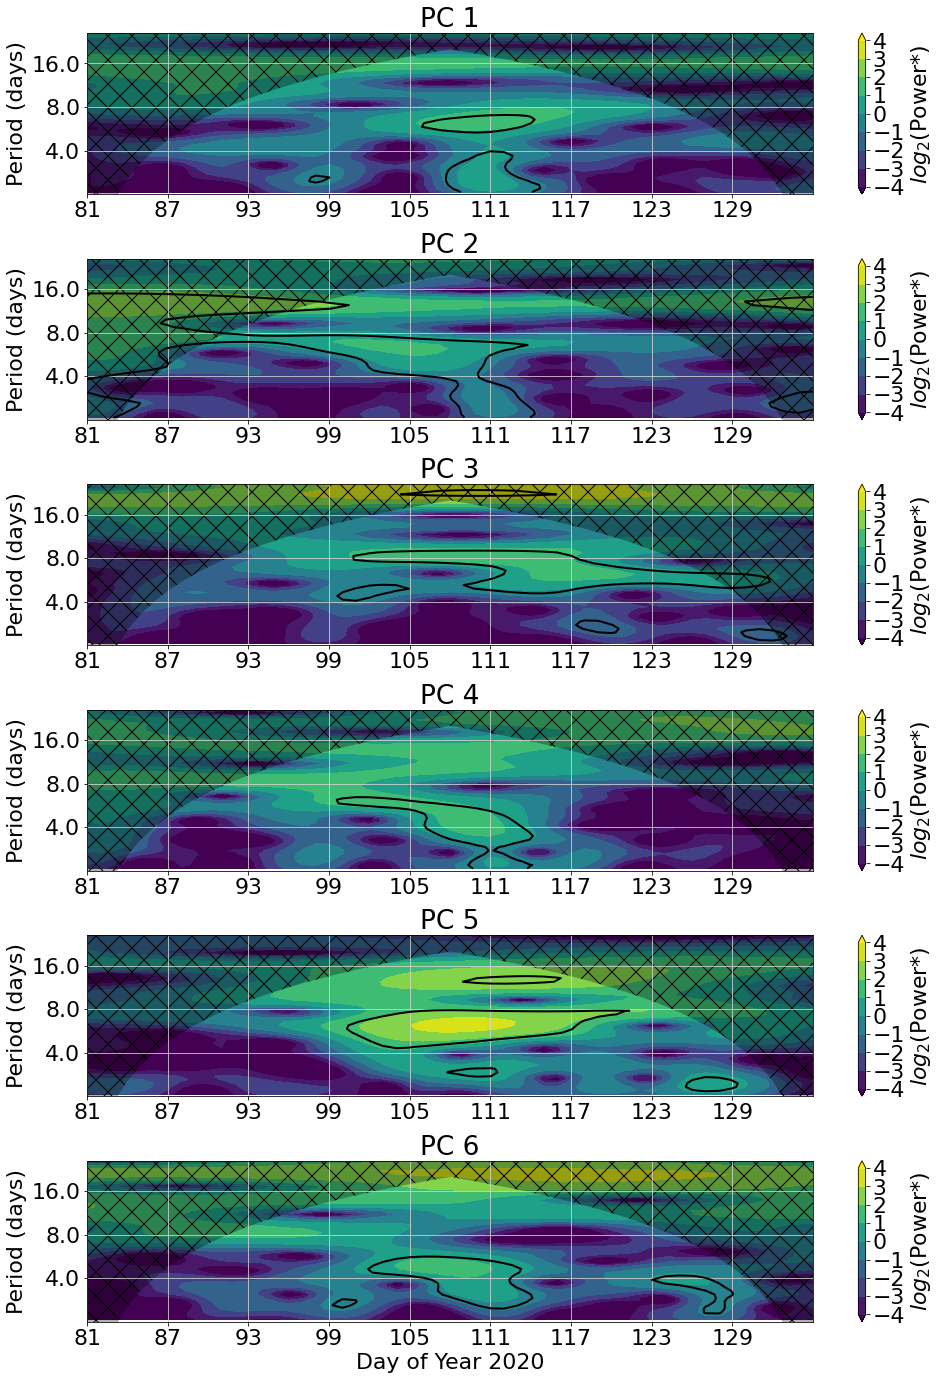

In [24]:
# Combine 5 PCs
fig,ax=plt.subplots(figsize=(14,20))
gs = gridspec.GridSpec(6,1) 
cmap='rainbow'
# fig.suptitle('Wavelet-Morlet GOLD O/N2 Lon[-30,-60]',size=15,x=0.55)

for g_idx in range(0,6):
    ax2=plt.subplot(gs[g_idx,0])
    #-----------
    pc_no=g_idx+1
    # select_time_idx= (datetime_array > datetime(2020,3,2))# & (datetime_array <= datetime(2020,4,28))
    dat=Weight_df.iloc[pc_no-1][1:].values
    # title = 'Test GOLD PCA'
    label = 'PC %1i' % (pc_no)
    units = 'O/N2'
    t0 = 81
    dt = 1  # freq in a day
    #------- Calculation -----------
    # We also create a time array in years.
    N = dat.size
    t = numpy.arange(0, N) * dt + t0

    # We write the following code to detrend and normalize the input data by its
    # standard deviation. Sometimes detrending is not necessary and simply
    # removing the mean value is good enough. However, if your dataset has a well
    # defined trend, such as the Mauna Loa CO\ :sub:`2` dataset available in the
    # above mentioned website, it is strongly advised to perform detrending.
    # Here, we fit a one-degree polynomial function and then subtract it from the
    # original data.
    p = numpy.polyfit(t - t0, dat, 1)
    dat_notrend = dat - numpy.polyval(p, t - t0)
    std = dat_notrend.std()  # Standard deviation
    var = std ** 2  # Variance
    dat_norm = dat_notrend / std  # Normalized dataset

    # The next step is to define some parameters of our wavelet analysis. We
    # select the mother wavelet, in this case the Morlet wavelet with
    # :math:`\omega_0=6`.
    mother = wavelet.Morlet(6)
    s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
    dj = 1 /12  # Twelve sub-octaves per octaves
    J = 7 / dj  # Seven powers of two with dj sub-octaves
    alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

    # The following routines perform the wavelet transform and inverse wavelet
    # transform using the parameters defined above. Since we have normalized our
    # input time-series, we multiply the inverse transform by the standard
    # deviation.
    wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                          mother)
    iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

    # We calculate the normalized wavelet and Fourier power spectra, as well as
    # the Fourier equivalent periods for each wavelet scale.
    power = (numpy.abs(wave)) ** 2
    fft_power = numpy.abs(fft) ** 2
    period = 1 / freqs

    # We could stop at this point and plot our results. However we are also
    # interested in the power spectra significance test. The power is significant
    # where the ratio ``power / sig95 > 1``.
    signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                            significance_level=0.95,
                                            wavelet=mother)
    sig95 = numpy.ones([1, N]) * signif[:, None]
    sig95 = power / sig95

    # Then, we calculate the global wavelet spectrum and determine its
    # significance level.
    glbl_power = power.max(axis=1)
    dof = N - scales  # Correction for padding at edges
    glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                            significance_level=0.95, dof=dof,
                                            wavelet=mother)

    # We also calculate the scale average between 2 years and 8 years, and its
    # significance level.
    sel = find((period >= 2) & (period < 8))
    Cdelta = mother.cdelta
    scale_avg = (scales * numpy.ones((N, 1))).transpose()
    scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
    scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
    scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                                significance_level=0.95,
                                                dof=[scales[sel[0]],
                                                      scales[sel[-1]]],
                                                wavelet=mother)
    
    #--------- End calculation -----
    bx=ax2
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
    im=bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
                extend='both', cmap=pyplot.cm.viridis)
    extent = [t.min(), t.max(), 0, max(period)]
    bx.contour(t, numpy.log2(period), sig95, [-1,1], colors='k', linewidths=2,
              extent=extent)
    bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                              t[:1] - dt, t[:1] - dt]),
            numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                              numpy.log2(period[-1:]), [1e-9]]),
            'k', alpha=0.3, hatch='x')
    bx.set_title('{}'.format(label))
    bx.set_ylabel('Period (days)')
    #
    Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                              numpy.ceil(numpy.log2(period.max())))
    bx.set_yticks(numpy.log2(Yticks))
    bx.set_yticklabels(Yticks)
    color_bar=fig.colorbar(im,extend='max')
    color_bar.set_label('$log_2$(Power*)')
    bx.set_ylim(np.log2([2,26]))
    bx.set_xlim([np.min(t),np.max(t)])
    bx.set_xticks(np.arange(min(days), max(days), 6.0))
    bx.set_xlabel('Day of Year 2020')
    bx.grid()

    if (g_idx < 5):
      plt.xlabel('')
    if pc_no == 5: 
      """"""
left  = 0.1  # the left side of the subplots of the figure
right = 1   # the right side of the subplots of the figure
bottom = 0.07   # the bottom of the subplots of the figure
top = 0.965     # the top of the subplots of the figure
wspace = 0.2#0.2   # the amount of width reserved for blank space between subplots
hspace = 0.4#0.2   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.savefig('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/' + 'wave_let_plot' + '.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

In [25]:
2**(numpy.log2(period[19]))

6.191266432580834

In [26]:
np.where(numpy.log2(power)== np.max(numpy.log2(power)))

(array([59]), array([0]))

In [27]:
t[29]

110

Check solar incides

In [28]:
# test_pd=pd.read_csv('/content/drive/MyDrive/Goel_2022_data_for_colab/Solar_index_Q6DW_time.csv')
test_pd = pd.read_csv('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/Solar_index_Q6DW_time.csv')

In [29]:
solar_pd=test_pd[(test_pd['DOY'] >= 81) & (test_pd['DOY'] <= 135)]

In [30]:
T_weight_df=Weight_df.T
T_weight_df=T_weight_df.drop(labels='Unnamed: 0')


In [31]:
pc_no=5

PC_data=T_weight_df[pc_no]
solar_data=solar_pd['IMF']
# np.corrcoef(PC_data,solar_data)

In [32]:
solar_pd.columns

Index(['YEAR', 'DOY', 'HR', 'IMF', 'SW_Density', 'SW_speed', 'SW_Pressure',
       'Kp', 'Dst', 'F107'],
      dtype='object')

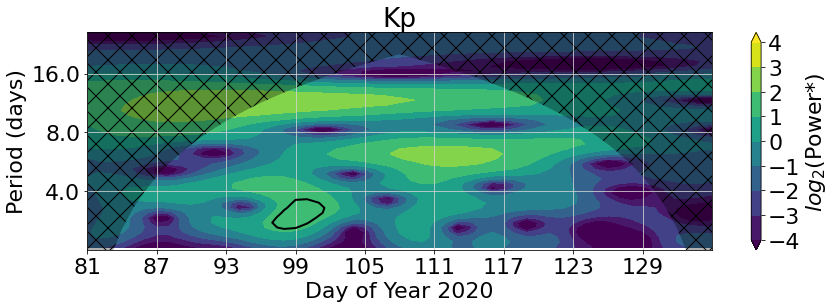

In [33]:
from __future__ import division
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find


sd_name='Kp'
# select_time_idx= (datetime_array > datetime(2020,3,2))# & (datetime_array <= datetime(2020,4,28))
# Load and define the dataset
dat=np.array(solar_pd[sd_name])
title = sd_name
label = 'Kp'
units = ''
t0 = 81 # Start from day 81
dt = 1  # In days


# We also create a time array in years.
N = dat.size
t = numpy.arange(0, N) * dt + t0

# We write the following code to detrend and normalize the input data by its
# standard deviation. Sometimes detrending is not necessary and simply
# removing the mean value is good enough. However, if your dataset has a well
# defined trend, such as the Mauna Loa CO\ :sub:`2` dataset available in the
# above mentioned website, it is strongly advised to perform detrending.
# Here, we fit a one-degree polynomial function and then subtract it from the
# original data.
p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

# The next step is to define some parameters of our wavelet analysis. We
# select the mother wavelet, in this case the Morlet wavelet with
# :math:`\omega_0=6`.
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 /12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

# The following routines perform the wavelet transform and inverse wavelet
# transform using the parameters defined above. Since we have normalized our
# input time-series, we multiply the inverse transform by the standard
# deviation.
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
# iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

# We calculate the normalized wavelet and Fourier power spectra, as well as
# the Fourier equivalent periods for each wavelet scale.
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

# We could stop at this point and plot our results. However we are also
# interested in the power spectra significance test. The power is significant
# where the ratio ``power / sig95 > 1``.
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.99,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

# # Then, we calculate the global wavelet spectrum and determine its
# # significance level.
# glbl_power = power.max(axis=1)
# dof = N - scales  # Correction for padding at edges
# glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
#                                         significance_level=0.95, dof=dof,
#                                        wavelet=mother)

# # We also calculate the scale average between 2 years and 8 years, and its
# # significance level.
# sel = find((period >= 2) & (period < 8))
# Cdelta = mother.cdelta
# scale_avg = (scales * numpy.ones((N, 1))).transpose()
# scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
# scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
# scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
#                                              significance_level=0.95,
#                                              dof=[scales[sel[0]],
#                                                   scales[sel[-1]]],
#                                              wavelet=mother)

# Finally, we plot our results in four different subplots containing the
# (i) original series anomaly and the inverse wavelet transform; (ii) the
# wavelet power spectrum (iii) the global wavelet and Fourier spectra ; and
# (iv) the range averaged wavelet spectrum. In all sub-plots the significance
# levels are either included as dotted lines or as filled contour lines.

# Prepare the figure
# pyplot.close('all')
# pyplot.ioff()
# figprops = dict(figsize=(14,4), dpi=72)
# fig = pyplot.figure(**figprops)

plt.rcParams.update({
    "font.size": 22,
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "lightgrey",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})

fig,ax=plt.subplots(figsize=(14,4))#fig=pp.figure(figsize=(12,10)
gs = gridspec.GridSpec(1, 1) 

bx=plt.subplot(gs[0,0])
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
im=bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('{}'.format(label))
bx.set_ylabel('Period (days)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)
color_bar=fig.colorbar(im,extend='max')
color_bar.set_label('$log_2$(Power*)')
bx.set_ylim(np.log2([2,26]))
bx.set_xlim([np.min(t),np.max(t)])
bx.set_xticks(np.arange(min(days), max(days), 6.0))
bx.set_xlabel('Day of Year 2020')
bx.grid()
pyplot.savefig('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/' + 'Kp' + '.jpeg', dpi = 300, bbox_inches = 'tight')



pyplot.show()

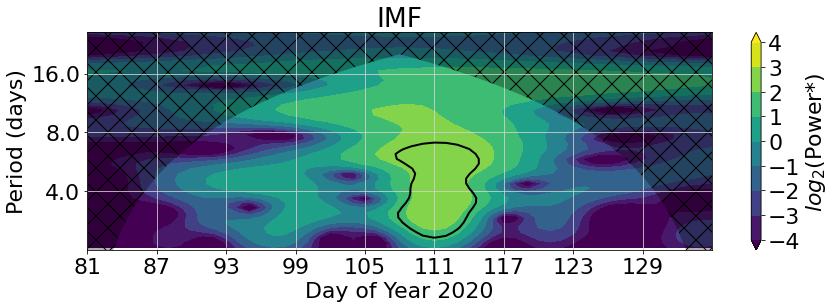

In [34]:
from __future__ import division
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find


sd_name='IMF'
# select_time_idx= (datetime_array > datetime(2020,3,2))# & (datetime_array <= datetime(2020,4,28))
# Load and define the dataset
dat=np.array(solar_pd[sd_name])
title = sd_name
label = 'IMF'
units = ''
t0 = 81 # Start from day 81
dt = 1  # In days


# We also create a time array in years.
N = dat.size
t = numpy.arange(0, N) * dt + t0

# We write the following code to detrend and normalize the input data by its
# standard deviation. Sometimes detrending is not necessary and simply
# removing the mean value is good enough. However, if your dataset has a well
# defined trend, such as the Mauna Loa CO\ :sub:`2` dataset available in the
# above mentioned website, it is strongly advised to perform detrending.
# Here, we fit a one-degree polynomial function and then subtract it from the
# original data.
p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

# The next step is to define some parameters of our wavelet analysis. We
# select the mother wavelet, in this case the Morlet wavelet with
# :math:`\omega_0=6`.
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 /12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

# The following routines perform the wavelet transform and inverse wavelet
# transform using the parameters defined above. Since we have normalized our
# input time-series, we multiply the inverse transform by the standard
# deviation.
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
# iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

# We calculate the normalized wavelet and Fourier power spectra, as well as
# the Fourier equivalent periods for each wavelet scale.
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

# We could stop at this point and plot our results. However we are also
# interested in the power spectra significance test. The power is significant
# where the ratio ``power / sig95 > 1``.
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.99,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

# # Then, we calculate the global wavelet spectrum and determine its
# # significance level.
# glbl_power = power.max(axis=1)
# dof = N - scales  # Correction for padding at edges
# glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
#                                         significance_level=0.95, dof=dof,
#                                        wavelet=mother)

# # We also calculate the scale average between 2 years and 8 years, and its
# # significance level.
# sel = find((period >= 2) & (period < 8))
# Cdelta = mother.cdelta
# scale_avg = (scales * numpy.ones((N, 1))).transpose()
# scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
# scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
# scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
#                                              significance_level=0.95,
#                                              dof=[scales[sel[0]],
#                                                   scales[sel[-1]]],
#                                              wavelet=mother)

# Finally, we plot our results in four different subplots containing the
# (i) original series anomaly and the inverse wavelet transform; (ii) the
# wavelet power spectrum (iii) the global wavelet and Fourier spectra ; and
# (iv) the range averaged wavelet spectrum. In all sub-plots the significance
# levels are either included as dotted lines or as filled contour lines.

# Prepare the figure
# pyplot.close('all')
# pyplot.ioff()
# figprops = dict(figsize=(14,4), dpi=72)
# fig = pyplot.figure(**figprops)

plt.rcParams.update({
    "font.size": 22,
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "lightgrey",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})

fig,ax=plt.subplots(figsize=(14,4))#fig=pp.figure(figsize=(12,10)
gs = gridspec.GridSpec(1, 1) 

bx=plt.subplot(gs[0,0])
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
im=bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('{}'.format(label))
bx.set_ylabel('Period (days)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)
color_bar=fig.colorbar(im,extend='max')
color_bar.set_label('$log_2$(Power*)')
bx.set_ylim(np.log2([2,26]))
bx.set_xlim([np.min(t),np.max(t)])
bx.set_xticks(np.arange(min(days), max(days), 6.0))
bx.set_xlabel('Day of Year 2020')
bx.grid()

pyplot.savefig('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/' + 'IMF' + '.jpeg', dpi = 300, bbox_inches = 'tight')


pyplot.show()

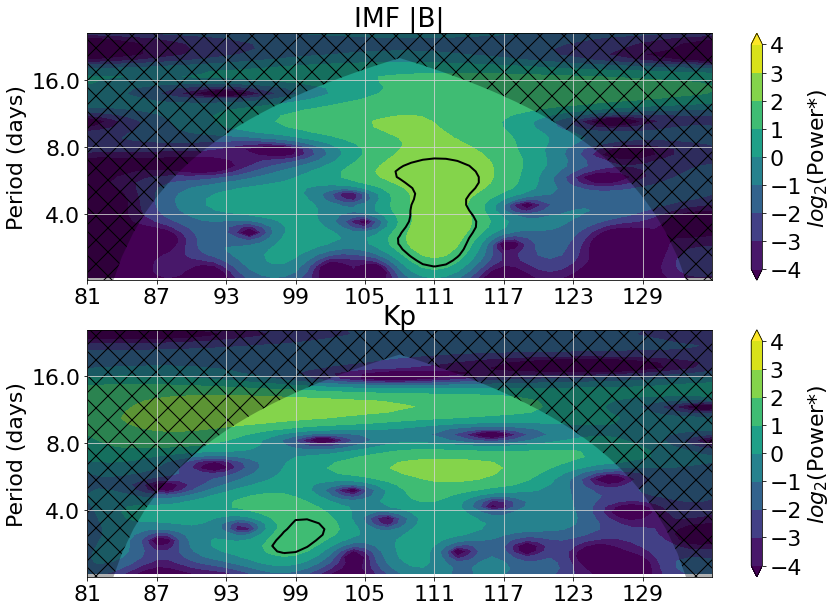

In [35]:
from __future__ import division
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find

fig,ax=plt.subplots(figsize=(14,10))
gs = gridspec.GridSpec(2,1)

for i, name in enumerate(['IMF', 'Kp']):
  sd_name= name
  # select_time_idx= (datetime_array > datetime(2020,3,2))# & (datetime_array <= datetime(2020,4,28))
  # Load and define the dataset
  dat=np.array(solar_pd[sd_name])
  title = sd_name
  label = name if name == 'Kp' else 'IMF |B|'
  units = ''
  t0 = 81 # Start from day 81
  dt = 1  # In days


  # We also create a time array in years.
  N = dat.size
  t = numpy.arange(0, N) * dt + t0

  # We write the following code to detrend and normalize the input data by its
  # standard deviation. Sometimes detrending is not necessary and simply
  # removing the mean value is good enough. However, if your dataset has a well
  # defined trend, such as the Mauna Loa CO\ :sub:`2` dataset available in the
  # above mentioned website, it is strongly advised to perform detrending.
  # Here, we fit a one-degree polynomial function and then subtract it from the
  # original data.
  p = numpy.polyfit(t - t0, dat, 1)
  dat_notrend = dat - numpy.polyval(p, t - t0)
  std = dat_notrend.std()  # Standard deviation
  var = std ** 2  # Variance
  dat_norm = dat_notrend / std  # Normalized dataset

  # The next step is to define some parameters of our wavelet analysis. We
  # select the mother wavelet, in this case the Morlet wavelet with
  # :math:`\omega_0=6`.
  mother = wavelet.Morlet(6)
  s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
  dj = 1 /12  # Twelve sub-octaves per octaves
  J = 7 / dj  # Seven powers of two with dj sub-octaves
  alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

  # The following routines perform the wavelet transform and inverse wavelet
  # transform using the parameters defined above. Since we have normalized our
  # input time-series, we multiply the inverse transform by the standard
  # deviation.
  wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                        mother)
  # iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

  # We calculate the normalized wavelet and Fourier power spectra, as well as
  # the Fourier equivalent periods for each wavelet scale.
  power = (numpy.abs(wave)) ** 2
  fft_power = numpy.abs(fft) ** 2
  period = 1 / freqs

  # We could stop at this point and plot our results. However we are also
  # interested in the power spectra significance test. The power is significant
  # where the ratio ``power / sig95 > 1``.
  signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                          significance_level=0.99,
                                          wavelet=mother)
  sig95 = numpy.ones([1, N]) * signif[:, None]
  sig95 = power / sig95

  # # Then, we calculate the global wavelet spectrum and determine its
  # # significance level.
  # glbl_power = power.max(axis=1)
  # dof = N - scales  # Correction for padding at edges
  # glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
  #                                         significance_level=0.95, dof=dof,
  #                                        wavelet=mother)

  # # We also calculate the scale average between 2 years and 8 years, and its
  # # significance level.
  # sel = find((period >= 2) & (period < 8))
  # Cdelta = mother.cdelta
  # scale_avg = (scales * numpy.ones((N, 1))).transpose()
  # scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
  # scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
  # scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
  #                                              significance_level=0.95,
  #                                              dof=[scales[sel[0]],
  #                                                   scales[sel[-1]]],
  #                                              wavelet=mother)

  # Finally, we plot our results in four different subplots containing the
  # (i) original series anomaly and the inverse wavelet transform; (ii) the
  # wavelet power spectrum (iii) the global wavelet and Fourier spectra ; and
  # (iv) the range averaged wavelet spectrum. In all sub-plots the significance
  # levels are either included as dotted lines or as filled contour lines.

  # Prepare the figure
  # pyplot.close('all')
  # pyplot.ioff()
  # figprops = dict(figsize=(14,4), dpi=72)
  # fig = pyplot.figure(**figprops)

  plt.rcParams.update({
      "font.size": 22,
      "lines.color": "black",
      "patch.edgecolor": "black",
      "text.color": "black",
      "axes.facecolor": "white",
      "axes.edgecolor": "black",
      "axes.labelcolor": "black",
      "xtick.color": "black",
      "ytick.color": "black",
      "grid.color": "lightgrey",
      "figure.facecolor": "white",
      "figure.edgecolor": "white",
      "savefig.facecolor": "white",
      "savefig.edgecolor": "white"})

  # fig,ax=plt.subplots(figsize=(14,4))#fig=pp.figure(figsize=(12,10)
  # gs = gridspec.GridSpec(1, 1) 

  bx=plt.subplot(gs[i,0])
  levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
  im=bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
              extend='both', cmap=pyplot.cm.viridis)
  extent = [t.min(), t.max(), 0, max(period)]
  bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
            extent=extent)
  bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                            t[:1] - dt, t[:1] - dt]),
          numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                            numpy.log2(period[-1:]), [1e-9]]),
          'k', alpha=0.3, hatch='x')
  bx.set_title('{}'.format(label))
  bx.set_ylabel('Period (days)')
  #
  Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                            numpy.ceil(numpy.log2(period.max())))
  bx.set_yticks(numpy.log2(Yticks))
  bx.set_yticklabels(Yticks)
  color_bar=fig.colorbar(im,extend='max')
  color_bar.set_label('$log_2$(Power*)')
  bx.set_ylim(np.log2([2,26]))
  bx.set_xlim([np.min(t),np.max(t)])
  bx.set_xticks(np.arange(min(days), max(days), 6.0))
  # bx.set_xlabel('Day of Year 2020')
  bx.grid()

plt.savefig('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/' + 'IMF_Kp_wavelet' + '.jpeg', dpi = 300, bbox_inches = 'tight')


pyplot.show()

In [38]:
# np.shape(kp_vals)

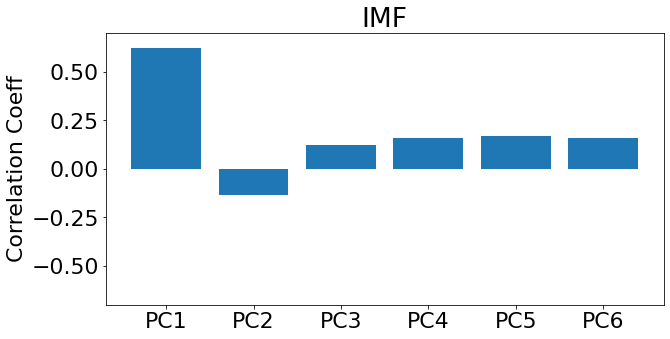

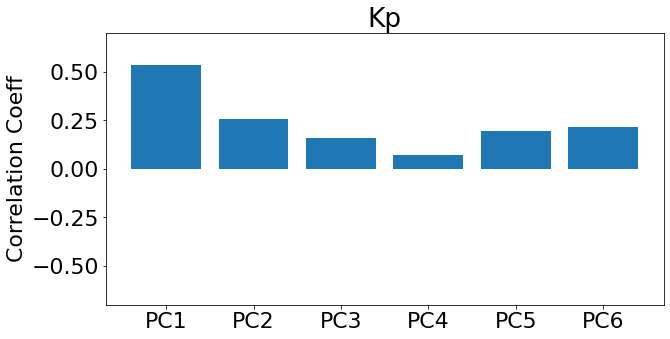

In [37]:
import scipy
for name in ['IMF', 'Kp']:
  corr_kp_list = []
  sd_name = name
  kp_vals = np.array(solar_pd[sd_name])
  for i in range(6):
    pca_weights = T_weight_df[i]
    corr = scipy.stats.pearsonr(pca_weights, kp_vals)
    corr_kp_list.append(corr[0])
  plt.figure(figsize = (10,5))
  plt.bar(x = ['PC1','PC2','PC3','PC4','PC5','PC6'], height = corr_kp_list)
  # plt.yticks([i/10 for i in range(-10,11)])
  plt.ylabel('Correlation Coeff')
  plt.title(sd_name)
  plt.ylim([-0.7,0.7])
  
plt.savefig("kp-imf-correlation.jpg", dpi = 300, bbox_inches = 'tight')
plt.show()

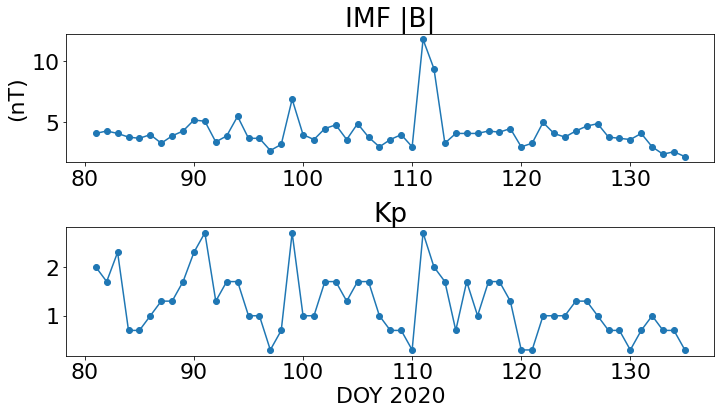

In [39]:
import matplotlib.gridspec as gridspec
plt.rcParams.update({
    "font.size": 22,
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "lightgray",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})

fig,ax=plt.subplots(figsize=(10,5))
gs = gridspec.GridSpec(2,1) 
# fig.suptitle('Wavelet-Morlet GOLD O/N2 Lon[-30,-60]',size=15,x=0.55)
ax2=plt.subplot(gs[0,0])
ax2.plot(t,np.array(solar_pd['IMF']),'o-')
ax2.set_title('IMF |B|')
ax2.set_ylabel('(nT)')
ax2=plt.subplot(gs[1,0])
ax2.plot(t,np.array(solar_pd['Kp'])/10.,'o-')
ax2.set_title('Kp')
ax2.set_ylabel('')
ax2.set_xlabel('DOY 2020')

# for g_idx in range(0,6):
#     ax2=plt.subplot(gs[g_idx,0])

#     title='PC%1i' % (pc_no)
#     plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
#     if (g_idx < 5):
#       plt.xlabel('')
left  = 0.1  # the left side of the subplots of the figure
right = 1   # the right side of the subplots of the figure
bottom = 0.07   # the bottom of the subplots of the figure
top = 0.965     # the top of the subplots of the figure
wspace = 0.5#0.2   # the amount of width reserved for blank space between subplots
hspace = 0.5#0.2   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.savefig('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/' + 'IMF_Kp_timeseries' + '.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

## **Retired Code**

In [ ]:
# fig,ax=plt.subplots(figsize=(14,16))
# gs = gridspec.GridSpec(5,1) 
# cmap='rainbow'
# # fig.suptitle('Wavelet-Morlet GOLD O/N2 Lon[-30,-60]',size=15,x=0.55)

# for g_idx in range(0,5):
#     ax2=plt.subplot(gs[g_idx,0])
#     pc_no=g_idx+1
#     title='PC%1i' % (pc_no)
#     #-----------
#     pc_no=g_idx+1
#     # select_time_idx= (datetime_array > datetime(2020,3,2))# & (datetime_array <= datetime(2020,4,28))
#     sindex=Weight_df.iloc[pc_no-1][1:]
#     data_norm = waipy.normalize(sindex)

#     alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1]; 
#     print("Lag-1 autocorrelation = {:4.2f}".format(alpha))
#     time=days
#     pad = 1         # pad the time series with zeroes (recommended)
#     dt=1
#     dj = 0.25      # this will do 4 sub-octaves per octave
#     s0 =2*dt       # this says start at a scale of 6 months if dt =annual
#     j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
#     lag1 = 0.72     # lag-1 autocorrelation for red noise background
#     param = 6
#     mother = 'Morlet'
#     # result = waipy.cwt(data, dt, pad, dj, s0, j1, lag1,  alpha, 7,name='x', mother=mother)
#     result=waipy.cwt(data_norm,dt, pad, dj, s0, j1,alpha, 7, mother=mother,name='x')



#     dtmin= 0.02125

#     ax2.set_title('PC%1i' % (pc_no))

#     #""" Contour plot wavelet power spectrum """
#     lev = np.linspace(-3, 4, 10)#levels(result, dtmin)
#     #     # import IPython
#     #     # IPython.embed()
#     #     # exit()
#     #     cmap = mpl.cm.get_cmap('viridis')
#     #     cmap.set_over('yellow')
#     #     cmap.set_under('cyan')
#     #     cmap.set_bad('red')
#         #ax2.imshow(np.log2(result['power']), cmap='jet', interpolation=None)
#         #ax2.set_aspect('auto')
#     pc = ax2.contourf(
#         time,
#         np.log2(result['period']),
#         np.log2(result['power']),
#         lev,
#         cmap=cmap,extend='max')
#     # lev = levels(result, dtmin)

#     # pc = ax2.contourf(
#     #     time,
#     #     np.log2(result['period']),
#     #     np.log2(result['power']),
#     #     np.log2(lev),
#     #     cmap=cmap,extend='max')
#     yt = range(
#         int(np.log2(result['period'][0])),
#         int(np.log2(result['period'][-1]) + 1))  # create the vector of periods
#     Yticks = [float(math.pow(2, p)) for p in yt]  # make 2^periods
#     # Yticks = [int(i) for i in Yticks]
#     ax2.set_yticks(yt)
#     ax2.set_yticklabels(Yticks)
#     ax2.set_ylim(
#         ymin=(np.log2(np.min(result['period']))),
#         ymax=(np.log2(np.max(result['period'])))
#     )
#     #  95% significance contour, levels at -99 (fake) and 1 (95% signif)
#     pc2 = ax2.contour(
#         time,
#         np.log2(result['period']),
#         result['sig95'],[-99, 0.90],
#         linewidths=2,color='k'
#     )

#     ax2.plot(time, np.log2(result['coi']), 'k')
#     # cone-of-influence , anything "below"is dubious
#     ax2.fill_between(
#         time,
#         np.log2(result['coi']),
#         int(np.log2(result['period'][-1]) + 1),
#         # color='white',
#         alpha=0.6,
#         hatch='x'
#     )

#     # def cb_formatter(x, pos):
#     #     # x is in base 2
#     #     linear_number = 2 ** x
#     #     return '{:.2f}'.format(linear_number)

#     # cbar = plt.colorbar(
#     #     pc,
#     #     format=mpl.ticker.FuncFormatter(cb_formatter),
#     # )
#     # cbar.set_label('Power')
#     color_bar=fig.colorbar(pc,extend='max')
#     color_bar.set_label('power')

#     ax2.set_ylim(
#         ymin=(np.log2(2)),
#         ymax=(np.log2(16))
#     )
#     # ax2.set_ylim(ax2.get_ylim()[::-1])
#     # ax2.set_xlabel('MM-DD %04i' % (start_doy[0]), fontsize=12)
#     ax2.set_ylabel('Period (days)')
#     ax2.grid()
#     ax2.set_xticks(np.arange(min(days), max(days), 6.0))
#     ax2.set_xlabel('Day of Year 2020')
#     # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#     # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
#     # plt.xticks(rotation=45)
#     #-----------
#     # plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
#     if (g_idx < 4):
#       plt.xlabel('')
# left  = 0.1  # the left side of the subplots of the figure
# right = 1   # the right side of the subplots of the figure
# bottom = 0.07   # the bottom of the subplots of the figure
# top = 0.965     # the top of the subplots of the figure
# wspace = 0.2#0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.4#0.2   # the amount of height reserved for white space between subplots

# plt.subplots_adjust(left, bottom, right, top, wspace, hspace)


In [ ]:
# import waipy
# from numpy import log2
# import matplotlib as mpl
# cmap='rainbow'

# # import waipy
# # importlib.reload(waipy)
# pc_no=1
# # select_time_idx= (datetime_array > datetime(2020,3,2))# & (datetime_array <= datetime(2020,4,28))
# sindex=dat
# data_norm = waipy.normalize(sindex)

# alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1]; 
# print("Lag-1 autocorrelation = {:4.2f}".format(alpha))
# time=days
# pad = 1         # pad the time series with zeroes (recommended)
# dt=1
# dj = 0.25      # this will do 4 sub-octaves per octave
# s0 =2*dt       # this says start at a scale of 6 months if dt =annual
# j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
# lag1 = 0.72     # lag-1 autocorrelation for red noise background
# param = 6
# mother = 'Morlet'
# # result = waipy.cwt(data, dt, pad, dj, s0, j1, lag1,  alpha, 7,name='x', mother=mother)
# result=waipy.cwt(data_norm,dt, pad, dj, s0, j1,alpha, 7, mother=mother,name='x')

# def levels(result, dtmin):
#     """
#     Power levels
#     """

#     dtmax = result['power'][:,-35:].max()
#     lev = []
#     for i in range(int(log2(dtmax / dtmin)) + 1):
#         dtmin = dtmin * 1.95
#         lev.append(dtmin)
#     return lev

# dtmin= 0.02125

# # plt.rcParams.update({
# #     "font.size": 22,
# #     "lines.color": "black",
# #     "patch.edgecolor": "black",
# #     "text.color": "black",
# #     "axes.facecolor": "white",
# #     "axes.edgecolor": "black",
# #     "axes.labelcolor": "black",
# #     "xtick.color": "black",
# #     "ytick.color": "black",
# #     "grid.color": "grey",
# #     "figure.facecolor": "white",
# #     "figure.edgecolor": "white",
# #     "savefig.facecolor": "white",
# #     "savefig.edgecolor": "white"})

# fig,ax=plt.subplots(figsize=(14,4))#fig=pp.figure(figsize=(12,10)
# gs = gridspec.GridSpec(1, 1) 
# fig.suptitle('Wavelet-Morlet Weight of PC%1i' % (pc_no),size=15,x=0.45)

# # suptitle='FUV %s Lat [%3i,%3i] all SLT' % (target_var_name,tar_lat_min,tar_lat_max)
# # fig.suptitle(suptitle,size=15)
# # X, Y = np.meshgrid(SLT_middle_array,lon_idx_array)
# # xlabel='SLT (hr)'
# # ylabel='Longitude'
# # # Plot 00
# # c_label='(%s)' % (target_var_unit)
# ax2=plt.subplot(gs[0,0])
# #""" Contour plot wavelet power spectrum """
# lev = np.linspace(-3, 4, 10)#levels(result, dtmin)
# #     # import IPython
# #     # IPython.embed()
# #     # exit()
# #     cmap = mpl.cm.get_cmap('viridis')
# #     cmap.set_over('yellow')
# #     cmap.set_under('cyan')
# #     cmap.set_bad('red')
#     #ax2.imshow(np.log2(result['power']), cmap='jet', interpolation=None)
#     #ax2.set_aspect('auto')
# pc = ax2.contourf(
#     time,
#     np.log2(result['period']),
#     np.log2(result['power']),
#     lev,
#     cmap=cmap,extend='max')
# yt = range(
#     int(np.log2(result['period'][0])),
#     int(np.log2(result['period'][-1]) + 1))  # create the vector of periods
# Yticks = [float(math.pow(2, p)) for p in yt]  # make 2^periods
# # Yticks = [int(i) for i in Yticks]
# ax2.set_yticks(yt)
# ax2.set_yticklabels(Yticks)
# ax2.set_ylim(
#     ymin=(np.log2(np.min(result['period']))),
#     ymax=(np.log2(np.max(result['period'])))
# )
# #  95% significance contour, levels at -99 (fake) and 1 (95% signif)
# pc2 = ax2.contour(
#     time,
#     np.log2(result['period']),
#     result['sig95'],[-99, 0.90],
#     linewidths=2,color='k'
# )

# ax2.plot(time, np.log2(result['coi']), 'k')
# # cone-of-influence , anything "below"is dubious
# ax2.fill_between(
#     time,
#     np.log2(result['coi']),
#     int(np.log2(result['period'][-1]) + 1),
#     # color='white',
#     alpha=0.6,
#     hatch='x'
# )

# # def cb_formatter(x, pos):
# #     # x is in base 2
# #     linear_number = 2 ** x
# #     return '{:.2f}'.format(linear_number)

# # cbar = plt.colorbar(
# #     pc,
# #     format=mpl.ticker.FuncFormatter(cb_formatter),
# # )
# # cbar.set_label('Power')

# ax2.set_ylim(
#     ymin=(np.log2(2)),
#     ymax=(np.log2(16))
# )
# # ax2.set_ylim(ax2.get_ylim()[::-1])
# # ax2.set_xlabel('MM-DD %04i' % (start_doy[0]), fontsize=12)

# color_bar=fig.colorbar(pc,extend='max')
# color_bar.set_label('power')
# ax2.set_ylabel('Period (days)', fontsize=12)
# ax2.grid()
# # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
# # plt.xticks(rotation=45)

In [ ]:
# !wget http://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt
# # https://pycwt.readthedocs.io/en/latest/tutorial.html#time-series-spectral-analysis-using-wavelets

In [ ]:
# fig,ax=plt.subplots(figsize=(14,16))
# gs = gridspec.GridSpec(5,1) 
# cmap='rainbow'
# # fig.suptitle('Wavelet-Morlet GOLD O/N2 Lon[-30,-60]',size=15,x=0.55)

# for g_idx in range(0,5):
#     ax2=plt.subplot(gs[g_idx,0])
#     pc_no=g_idx+1
#     title='PC%1i' % (pc_no)
#     #-----------
#     pc_no=g_idx+1
#     # select_time_idx= (datetime_array > datetime(2020,3,2))# & (datetime_array <= datetime(2020,4,28))
#     sindex=Weight_df.iloc[pc_no-1][1:]
#     data_norm = waipy.normalize(sindex)

#     alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1]; 
#     print("Lag-1 autocorrelation = {:4.2f}".format(alpha))
#     time=days
#     pad = 1         # pad the time series with zeroes (recommended)
#     dt=1
#     dj = 0.25      # this will do 4 sub-octaves per octave
#     s0 =2*dt       # this says start at a scale of 6 months if dt =annual
#     j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
#     lag1 = 0.72     # lag-1 autocorrelation for red noise background
#     param = 6
#     mother = 'Morlet'
#     # result = waipy.cwt(data, dt, pad, dj, s0, j1, lag1,  alpha, 7,name='x', mother=mother)
#     result=waipy.cwt(data_norm,dt, pad, dj, s0, j1,alpha, 7, mother=mother,name='x')



#     dtmin= 0.02125

#     ax2.set_title('PC%1i' % (pc_no))

#     #""" Contour plot wavelet power spectrum """
#     lev = np.linspace(-3, 4, 10)#levels(result, dtmin)
#     #     # import IPython
#     #     # IPython.embed()
#     #     # exit()
#     #     cmap = mpl.cm.get_cmap('viridis')
#     #     cmap.set_over('yellow')
#     #     cmap.set_under('cyan')
#     #     cmap.set_bad('red')
#         #ax2.imshow(np.log2(result['power']), cmap='jet', interpolation=None)
#         #ax2.set_aspect('auto')
#     pc = ax2.contourf(
#         time,
#         np.log2(result['period']),
#         np.log2(result['power']),
#         lev,
#         cmap=cmap,extend='max')
#     # lev = levels(result, dtmin)

#     # pc = ax2.contourf(
#     #     time,
#     #     np.log2(result['period']),
#     #     np.log2(result['power']),
#     #     np.log2(lev),
#     #     cmap=cmap,extend='max')
#     yt = range(
#         int(np.log2(result['period'][0])),
#         int(np.log2(result['period'][-1]) + 1))  # create the vector of periods
#     Yticks = [float(math.pow(2, p)) for p in yt]  # make 2^periods
#     # Yticks = [int(i) for i in Yticks]
#     ax2.set_yticks(yt)
#     ax2.set_yticklabels(Yticks)
#     ax2.set_ylim(
#         ymin=(np.log2(np.min(result['period']))),
#         ymax=(np.log2(np.max(result['period'])))
#     )
#     #  95% significance contour, levels at -99 (fake) and 1 (95% signif)
#     pc2 = ax2.contour(
#         time,
#         np.log2(result['period']),
#         result['sig95'],[-99, 0.90],
#         linewidths=2,color='k'
#     )

#     ax2.plot(time, np.log2(result['coi']), 'k')
#     # cone-of-influence , anything "below"is dubious
#     ax2.fill_between(
#         time,
#         np.log2(result['coi']),
#         int(np.log2(result['period'][-1]) + 1),
#         # color='white',
#         alpha=0.6,
#         hatch='x'
#     )

#     # def cb_formatter(x, pos):
#     #     # x is in base 2
#     #     linear_number = 2 ** x
#     #     return '{:.2f}'.format(linear_number)

#     # cbar = plt.colorbar(
#     #     pc,
#     #     format=mpl.ticker.FuncFormatter(cb_formatter),
#     # )
#     # cbar.set_label('Power')
#     color_bar=fig.colorbar(pc,extend='max')
#     color_bar.set_label('power')

#     ax2.set_ylim(
#         ymin=(np.log2(2)),
#         ymax=(np.log2(16))
#     )
#     # ax2.set_ylim(ax2.get_ylim()[::-1])
#     # ax2.set_xlabel('MM-DD %04i' % (start_doy[0]), fontsize=12)
#     ax2.set_ylabel('Period (days)')
#     ax2.grid()
#     ax2.set_xticks(np.arange(min(days), max(days), 6.0))
#     ax2.set_xlabel('Day of Year 2020')
#     # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#     # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
#     # plt.xticks(rotation=45)
#     #-----------
#     # plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
#     if (g_idx < 4):
#       plt.xlabel('')
# left  = 0.1  # the left side of the subplots of the figure
# right = 1   # the right side of the subplots of the figure
# bottom = 0.07   # the bottom of the subplots of the figure
# top = 0.965     # the top of the subplots of the figure
# wspace = 0.2#0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.4#0.2   # the amount of height reserved for white space between subplots

# plt.subplots_adjust(left, bottom, right, top, wspace, hspace)


In [ ]:
# """
# In this example we will load the NINO3 sea surface temperature anomaly dataset
# between 1871 and 1996. This and other sample data files are kindly provided by
# C. Torrence and G. Compo at
# <http://paos.colorado.edu/research/wavelets/software.html>.

# """
# # We begin by importing the relevant libraries. Please make sure that PyCWT is
# # properly installed in your system.
# from __future__ import division
# import numpy
# from matplotlib import pyplot

# import pycwt as wavelet
# from pycwt.helpers import find

# # Then, we load the dataset and define some data related parameters. In this
# # case, the first 19 lines of the data file contain meta-data, that we ignore,
# # since we set them manually (*i.e.* title, units).
# # url = 'http://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
# # dat = numpy.genfromtxt(url, skip_header=19)
# # title = 'NINO3 Sea Surface Temperature'
# # label = 'NINO3 SST'
# # units = 'degC'
# # t0 = 1871.0
# # dt = 0.25  # In years

# pc_no=2
# # select_time_idx= (datetime_array > datetime(2020,3,2))# & (datetime_array <= datetime(2020,4,28))
# dat=Weight_df.iloc[pc_no-1][1:].values
# title = 'Test GOLD PCA'
# label = 'PC %1i' % (pc_no)
# units = 'O/N2'
# t0 = 81
# dt = 1  # In years
# # We also create a time array in years.
# N = dat.size
# t = numpy.arange(0, N) * dt + t0

# # We write the following code to detrend and normalize the input data by its
# # standard deviation. Sometimes detrending is not necessary and simply
# # removing the mean value is good enough. However, if your dataset has a well
# # defined trend, such as the Mauna Loa CO\ :sub:`2` dataset available in the
# # above mentioned website, it is strongly advised to perform detrending.
# # Here, we fit a one-degree polynomial function and then subtract it from the
# # original data.
# p = numpy.polyfit(t - t0, dat, 1)
# dat_notrend = dat - numpy.polyval(p, t - t0)
# std = dat_notrend.std()  # Standard deviation
# var = std ** 2  # Variance
# dat_norm = dat_notrend / std  # Normalized dataset

# # The next step is to define some parameters of our wavelet analysis. We
# # select the mother wavelet, in this case the Morlet wavelet with
# # :math:`\omega_0=6`.
# mother = wavelet.Morlet(6)
# s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
# dj = 1 / 12  # Twelve sub-octaves per octaves
# J = 7 / dj  # Seven powers of two with dj sub-octaves
# alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

# # The following routines perform the wavelet transform and inverse wavelet
# # transform using the parameters defined above. Since we have normalized our
# # input time-series, we multiply the inverse transform by the standard
# # deviation.
# wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
#                                                       mother)
# iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

# # We calculate the normalized wavelet and Fourier power spectra, as well as
# # the Fourier equivalent periods for each wavelet scale.
# power = (numpy.abs(wave)) ** 2
# fft_power = numpy.abs(fft) ** 2
# period = 1 / freqs

# # We could stop at this point and plot our results. However we are also
# # interested in the power spectra significance test. The power is significant
# # where the ratio ``power / sig95 > 1``.
# signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
#                                          significance_level=0.95,
#                                          wavelet=mother)
# sig95 = numpy.ones([1, N]) * signif[:, None]
# sig95 = power / sig95

# # Then, we calculate the global wavelet spectrum and determine its
# # significance level.
# glbl_power = power.mean(axis=1)
# dof = N - scales  # Correction for padding at edges
# glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
#                                         significance_level=0.95, dof=dof,
#                                         wavelet=mother)

# # We also calculate the scale average between 2 years and 8 years, and its
# # significance level.
# sel = find((period >= 2) & (period < 8))
# Cdelta = mother.cdelta
# scale_avg = (scales * numpy.ones((N, 1))).transpose()
# scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
# scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
# scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
#                                              significance_level=0.95,
#                                              dof=[scales[sel[0]],
#                                                   scales[sel[-1]]],
#                                              wavelet=mother)

# # Finally, we plot our results in four different subplots containing the
# # (i) original series anomaly and the inverse wavelet transform; (ii) the
# # wavelet power spectrum (iii) the global wavelet and Fourier spectra ; and
# # (iv) the range averaged wavelet spectrum. In all sub-plots the significance
# # levels are either included as dotted lines or as filled contour lines.

# # Prepare the figure
# pyplot.close('all')
# pyplot.ioff()
# figprops = dict(figsize=(11, 8), dpi=72)
# fig = pyplot.figure(**figprops)

# # First sub-plot, the original time series anomaly and inverse wavelet
# # transform.
# ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
# ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
# ax.plot(t, dat, 'k', linewidth=1.5)
# ax.set_title('a) {}'.format(title))
# ax.set_ylabel(r'{} [{}]'.format(label, units))

# # Second sub-plot, the normalized wavelet power spectrum and significance
# # level contour lines and cone of influece hatched area. Note that period
# # scale is logarithmic.
# bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
# levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
# bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
#             extend='both', cmap=pyplot.cm.viridis)
# extent = [t.min(), t.max(), 0, max(period)]
# bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
#            extent=extent)
# bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
#                            t[:1] - dt, t[:1] - dt]),
#         numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
#                            numpy.log2(period[-1:]), [1e-9]]),
#         'k', alpha=0.3, hatch='x')
# bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
# bx.set_ylabel('Period (years)')
# #
# Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
#                            numpy.ceil(numpy.log2(period.max())))
# bx.set_yticks(numpy.log2(Yticks))
# bx.set_yticklabels(Yticks)

# # Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# # noise spectra. Note that period scale is logarithmic.
# cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
# cx.plot(glbl_signif, numpy.log2(period), 'k--')
# cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
# cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
#         linewidth=1.)
# cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
# cx.set_title('c) Global Wavelet Spectrum')
# cx.set_xlabel(r'Power [({})^2]'.format(units))
# cx.set_xlim([0, glbl_power.max() + var])
# cx.set_ylim(numpy.log2([period.min(), period.max()]))
# cx.set_yticks(numpy.log2(Yticks))
# cx.set_yticklabels(Yticks)
# pyplot.setp(cx.get_yticklabels(), visible=False)

# # Fourth sub-plot, the scale averaged wavelet spectrum.
# dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
# dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
# dx.plot(t, scale_avg, 'k-', linewidth=1.5)
# dx.set_title('d) {}--{} year scale-averaged power'.format(2, 8))
# dx.set_xlabel('Time (year)')
# dx.set_ylabel(r'Average variance [{}]'.format(units))
# ax.set_xlim([t.min(), t.max()])

# pyplot.show()

In [ ]:
# wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,mother)

In [ ]:
# sig95

In [ ]:
# dj

In [ ]:
# J